E : 0.036597222222222225


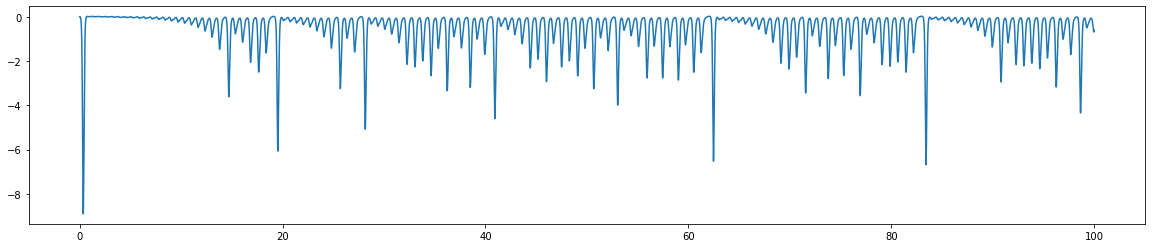

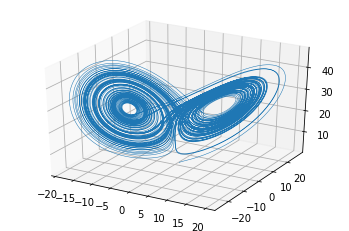

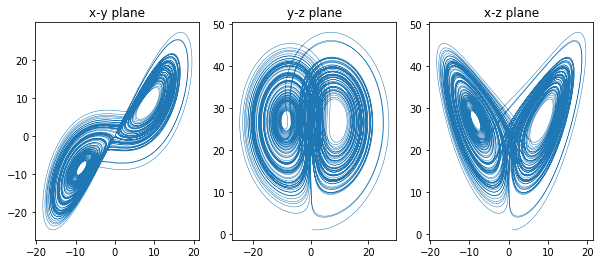

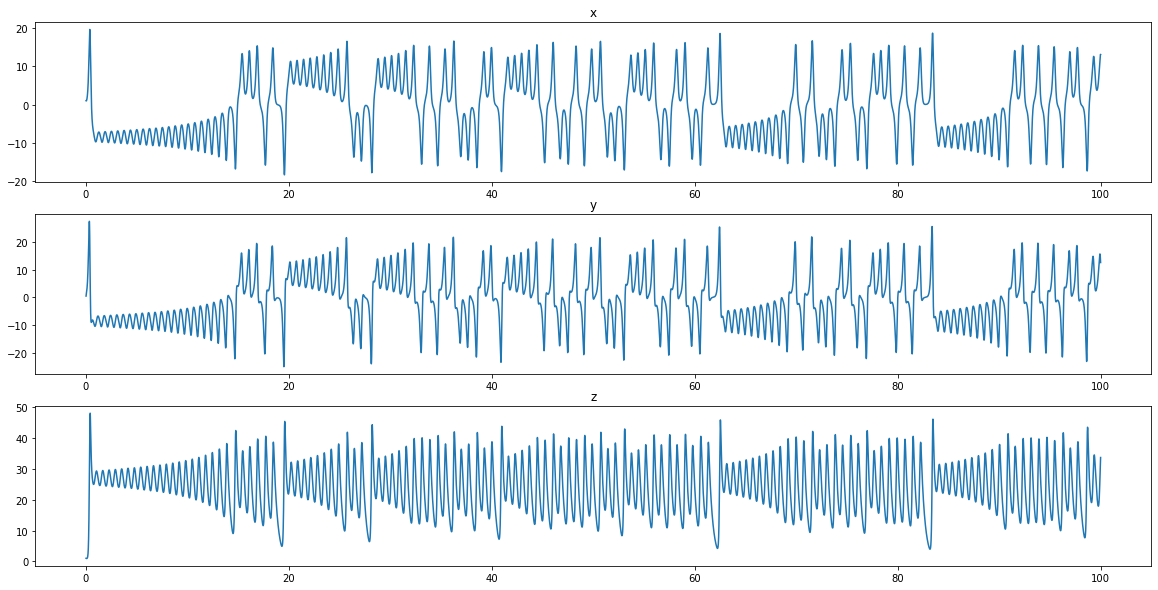

수렴 : 13.077932095354834 12.501579547025749 33.64562198099968


In [2]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import glob, os
import IPython.display as IPdisplay

# define the system parameters sigma, rho, and beta
#sigma = 10, rho = 28, beta = 8/3
#rho => 9, 28, 100
#sigma => 0.7 / 100~40,000 / 5 / 0.015
#beta => <1 / 1 / 8/3 / 10~

sigma = 10
rho   = 28
beta  = 8/3
#3.46999248...
def LE(t, x):
    global sigma, rho, beta
    return [sigma*(x[1]-x[0]), x[0]*(rho-x[2])-x[1], x[0]*x[1]-(beta)*x[2]]

def LE2(x):
    global sigma, rho, beta
    vx = sigma*(x[1]-x[0])
    vy = x[0]*(rho-x[2])-x[1]
    vz = x[0]*x[1]-(beta)*x[2]
    return 0.5*(10**-4)*(vx**2+vy**2+vz**2)


interval = 100000
start, end = 0,100000
t = 100
l = 0.5
# 1 0.5 1 처음에
init = [1,0.5,1]
#init2 = [10,10,10]
v0x = sigma*(init[1]-init[0])
v0y = init[0]*(rho-init[2])-init[1]
v0z = init[0]*init[1]-(beta)*init[2]
E = 0.5*(10**-4)*(v0x**2+v0y**2+v0z**2)
print("E :",E)

t_span = np.linspace(0,t,interval)
sol = solve_ivp( LE, (0,t), init, t_eval=t_span)
sol_data = sol.y[0][start:end], sol.y[1][start:end], sol.y[2][start:end]
#sol2 = solve_ivp( LE, (0,t), init2, t_eval=t_span)
#sol_data2 = sol2.y[0][start:end], sol2.y[1][start:end], sol2.y[2][start:end]
T = LE2(sol_data)
plt.figure(figsize=(20,4))
plt.plot(np.linspace(start, end, end-start)/interval*t,E-T)
plt.show()

'''
for angle in range(0,360):
    lorentz = plt.figure().add_subplot(projection='3d')
    lorentz.view_init(30,angle)
    lorentz.plot(sol.y[0], sol.y[1], sol.y[2], linewidth=0.1)
    plt.savefig('{}/{:03d}.png'.format(save_folder, angle), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
'''

lorentz = plt.figure().add_subplot(projection='3d')
lorentz.plot(sol.y[0][start:end], sol.y[1][start:end], sol.y[2][start:end], linewidth=l)
#lorentz.plot(sol2.y[0][start:end], sol2.y[1][start:end], sol2.y[2][start:end], linewidth=0.1)
plt.show()
#lorentz = plt.figure().add_subplot(projection='3d')
#lorentz.plot(sol2.y[0][start:end], sol2.y[1][start:end], sol2.y[2][start:end], linewidth=1,color='orange')
#plt.show()
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("x-y plane")
plt.plot(sol.y[0][start:end], sol.y[1][start:end], linewidth=l)
#plt.plot(sol2.y[0][start:end], sol2.y[1][start:end], linewidth=0.3)
plt.subplot(1,3,2)
plt.title("y-z plane")
plt.plot(sol.y[1][start:end], sol.y[2][start:end], linewidth=l)
#plt.plot(sol2.y[1][start:end], sol2.y[2][start:end], linewidth=0.3)
plt.subplot(1,3,3)
plt.title("x-z plane")
plt.plot(sol.y[0][start:end], sol.y[2][start:end], linewidth=l)
#plt.plot(sol2.y[0][start:end], sol2.y[2][start:end], linewidth=0.3)
plt.show()

save_folder = 'images/axis-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
'''
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/axisanimate.gif'
gif = images[0]
#gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)
'''
'''
li1 = []
li2 = []
for i in range(interval):
    x = sol.y[0][i]
    y = sol.y[1][i]
    z = sol.y[2][i]
    for j in range(interval):
        x2 = sol.y[0][j]
        y2 = sol.y[1][j]
        z2 = sol.y[2][j]
        li1.append((x2-x)**2+(y2-y)**2+(z2-z)**2)
    li2.append(sum(li1))
    li1 = []
print("안정점 중에서 가장 영향력이 큰.",sol.y[0][np.argmin(li2)],sol.y[1][np.argmin(li2)],sol.y[2][np.argmin(li2)])
'''


plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title("x")
plt.plot(np.linspace(start, end, end-start)/interval*t, sol.y[0][start:end])
#plt.plot(np.linspace(start, end, end-start)/interval*t, sol2.y[0][start:end])
plt.subplot(3,1,2)
plt.title("y")
plt.plot(np.linspace(start, end, end-start)/interval*t, sol.y[1][start:end])
#plt.plot(np.linspace(start, end, end-start)/interval*t, sol2.y[1][start:end])
plt.subplot(3,1,3)
plt.title("z")
plt.plot(np.linspace(start, end, end-start)/interval*t, sol.y[2][start:end])
#plt.plot(np.linspace(start, end, end-start)/interval*t, sol2.y[2][start:end])
plt.show()

#수렴하는 값 구하는거 쓰는 코드
print("수렴 :",sol.y[0][-1],sol.y[1][-1],sol.y[2][-1])

## from PIL import Image
import glob, os
save_folder = 'images/axis-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [7]:
IPdisplay.Image(url=gif_filepath)

NameError: name 'gif_filepath' is not defined

In [37]:
a = np.linspace(0,100,101)
start, end = 91,101
print(a)
print(a[91:101])
print(a[start:end])
print(len(a[91:101]))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]
[ 91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]
[ 91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]
10


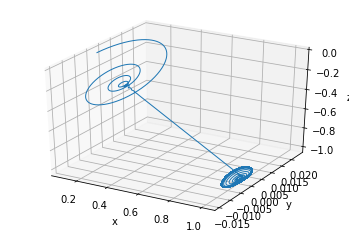

In [204]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# parameters
alpha = 15.395
beta = 28
R = -1.001
C_2 = -0.714

def chua(u, t):
    x, y, z = u  
    # electrical response of the nonlinear resistor
    f_x = C_2*x + 0.5*(R-C_2)*(abs(x+1)-abs(x-1))
    dudt = [alpha*(y-x-f_x), x - y + z, -beta * y]
    return dudt

# time discretization
t_0 = 0
dt = 1e-3
t_final = 300
t = np.arange(t_0, t_final, dt)

# initial conditions
u0 = [0.1,0,0]
# integrate ode system
sol = odeint(chua, u0, t)

# 3d-plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot(sol[:,0],sol[:,1],sol[:,2],linewidth=1)